In [2]:
import warnings
warnings.filterwarnings('ignore')

from itertools import cycle

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from imblearn.over_sampling import ADASYN

from scipy.stats import f_oneway

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report,  recall_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv('Features of Collected Data/Features_CollectedData.csv')
X=df.loc[:, 'VMD-mean':'Detail Coeff-MFCC-13']
y=df['Disease']
X=X.reset_index(drop=True)
y=y.reset_index(drop=True)

ANOVA

In [27]:
fs = SelectKBest(score_func=f_classif, k=68)
fs.fit(X, y)
X_new=fs.transform(X)
ad=ADASYN()
X_resampled, y_resampled = ad.fit_resample(X_new, y)

ROC Curve

In [70]:
def roc_curve_1_all(X, y_t, model):
    
    lw=1
    y=OneHotEncoder().fit_transform(y_t.values.reshape(-1, 1)).toarray()
    n_classes = y.shape[1]

#     # Add noisy features to make the problem harder
#     random_state = np.random.RandomState(0)
#     n_samples, n_features = X.shape
#     X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

#     # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#     # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#     print(y_score)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return fpr["macro"], tpr["macro"], roc_auc["macro"]

In [57]:
def roc_curve_2_all(X, y_t, model):
    
    lw=1
    y=OneHotEncoder().fit_transform(y_t.values.reshape(-1, 1)).toarray()
    n_classes = y.shape[1]

#     # Add noisy features to make the problem harder
#     random_state = np.random.RandomState(0)
#     n_samples, n_features = X.shape
#     X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

#     # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#     # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#     print(y_score)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr["macro"], tpr["macro"], roc_auc["macro"]

In [103]:
def roc_curve_1(X, y_t, model, m_name):
    
    lw=1
    y=OneHotEncoder().fit_transform(y_t.values.reshape(-1, 1)).toarray()
    n_classes = y.shape[1]

#     # Add noisy features to make the problem harder
#     random_state = np.random.RandomState(0)
#     n_samples, n_features = X.shape
#     X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

#     # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#     # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#     print(y_score)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle="dashed",
        linewidth=2,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="blue",
        linestyle="dashed",
        linewidth=2,
    )
    
    classes1=["Asthma", "Bronchiectasis", "COPD", "Healthy"]
    colors = cycle(["darkblue", "darkorange", "cornflowerblue", "lightgreen"])
    for i, color, c_name in zip(range(n_classes), colors, classes1):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(c_name, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(m_name)
    plt.legend(loc="lower right")

In [91]:
def roc_curve_2(X, y_t, model, m_name):
    
    lw=1
    y=OneHotEncoder().fit_transform(y_t.values.reshape(-1, 1)).toarray()
    n_classes = y.shape[1]

#     # Add noisy features to make the problem harder
#     random_state = np.random.RandomState(0)
#     n_samples, n_features = X.shape
#     X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

#     # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#     # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#     print(y_score)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle="dashed",
        linewidth=2,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="blue",
        linestyle="dashed",
        linewidth=2,
    )
    
    classes1=["Asthma", "Bronchiectasis", "COPD", "Healthy"]
    colors = cycle(["darkblue", "darkorange", "cornflowerblue", "lightgreen"])
    for i, color, c_name in zip(range(n_classes), colors, classes1):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(c_name, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(m_name)
    plt.legend(loc="lower right")
#     plt.show()

In [77]:
def plot_all_1(X, y, model, m_name, c_o):
    
    fpr, tpr, roc_auc=roc_curve_1_all(X, y, model)
    print(roc_auc)
    plt.plot(
        fpr,
        tpr,
        label=m_name+" (area = {0:0.2f})".format(roc_auc),
        color=c_o,
        linestyle="dashed",
        linewidth=2,
    )

In [74]:
def plot_all_2(X, y, model, m_name, c_o):
    
    
    fpr, tpr, roc_auc=roc_curve_2_all(X, y, model)
    print(roc_auc)
    plt.plot(
        fpr,
        tpr,
        label=m_name+" (area = {0:0.2f})".format(roc_auc),
        color=c_o,
        linestyle="dashed",
        linewidth=2,
    )

0.83515310854982
0.9526794698908062
0.8764899883381457
0.890114042782602


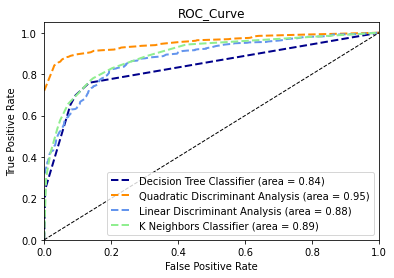

In [101]:
plt.figure()

plot_all_1(X_resampled, y_resampled, DecisionTreeClassifier(), "Decision Tree Classifier", "darkblue")
plot_all_1(X_resampled, y_resampled, QuadraticDiscriminantAnalysis(), "Quadratic Discriminant Analysis", "darkorange")
plot_all_2(X_resampled, y_resampled, LinearDiscriminantAnalysis(),  "Linear Discriminant Analysis", "cornflowerblue")
plot_all_1(X_resampled, y_resampled, KNeighborsClassifier(), "K Neighbors Classifier",  "lightgreen")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_Curve")
plt.legend(loc="lower right")

Decision Tree

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)

Accuracy score: 0.8314606741573034

[[28  7 10  0]
 [ 3 39  2  1]
 [ 2  2 41  0]
 [ 1  2  0 40]]
                precision    recall  f1-score   support

        Asthma       0.82      0.62      0.71        45
Bronchiectasis       0.78      0.87      0.82        45
          COPD       0.77      0.91      0.84        45
       Healthy       0.98      0.93      0.95        43

      accuracy                           0.83       178
     macro avg       0.84      0.83      0.83       178
  weighted avg       0.84      0.83      0.83       178

fit_time :  0.028041362762451172
score_time :  0.0045887470245361325
test_precision_macro :  0.7173629333867819
test_recall_macro :  0.716458237583111
test_accuracy :  0.7147717895004126


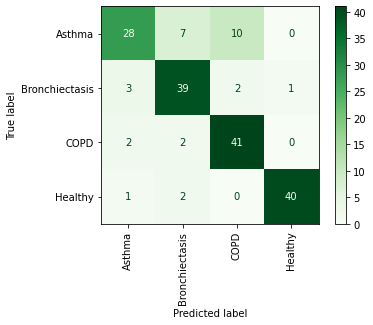

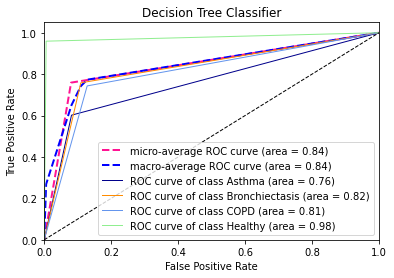

In [109]:
m_tree=DecisionTreeClassifier()

m_tree.fit(X_train, y_train)

y_pred_tree=m_tree.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_tree)))
print()
print(confusion_matrix(y_test, y_pred_tree))

print(classification_report(y_test, y_pred_tree))

print(plot_confusion_matrix(m_tree, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_1(X_resampled, y_resampled, DecisionTreeClassifier(), "Decision Tree Classifier")

model=DecisionTreeClassifier()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Quadratic Discriminant 

Accuracy score: 0.9831460674157303

[[45  0  0  0]
 [ 2 43  0  0]
 [ 0  0 45  0]
 [ 1  0  0 42]]
                precision    recall  f1-score   support

        Asthma       0.94      1.00      0.97        45
Bronchiectasis       1.00      0.96      0.98        45
          COPD       1.00      1.00      1.00        45
       Healthy       1.00      0.98      0.99        43

      accuracy                           0.98       178
     macro avg       0.98      0.98      0.98       178
  weighted avg       0.98      0.98      0.98       178

fit_time :  0.003997325897216797
score_time :  0.003998327255249024
test_precision_macro :  0.9916666666666668
test_recall_macro :  0.9897932816537468
test_accuracy :  0.9898876404494382


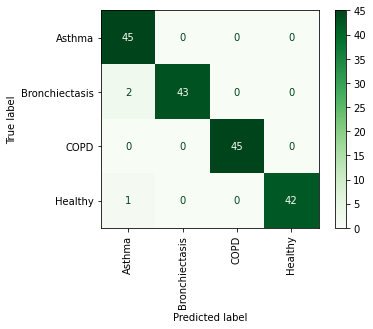

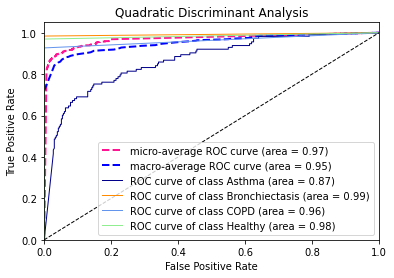

In [111]:
m_quad=QuadraticDiscriminantAnalysis()

m_quad.fit(X_train, y_train)

y_pred_quad=m_quad.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_quad)))
print()
print(confusion_matrix(y_test, y_pred_quad))

print(classification_report(y_test, y_pred_quad))

print(plot_confusion_matrix(m_quad, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_1(X_resampled, y_resampled, QuadraticDiscriminantAnalysis(), "Quadratic Discriminant Analysis")

model=QuadraticDiscriminantAnalysis()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Ridge Classifier

Accuracy score: 0.7134831460674157

[[19 16 10  0]
 [ 1 36  8  0]
 [ 8  8 29  0]
 [ 0  0  0 43]]
                precision    recall  f1-score   support

        Asthma       0.68      0.42      0.52        45
Bronchiectasis       0.60      0.80      0.69        45
          COPD       0.62      0.64      0.63        45
       Healthy       1.00      1.00      1.00        43

      accuracy                           0.71       178
     macro avg       0.72      0.72      0.71       178
  weighted avg       0.72      0.71      0.71       178



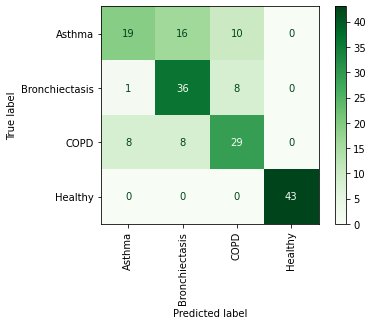

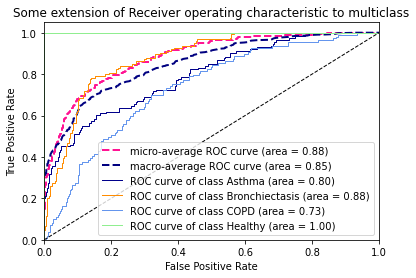

fit_time :  0.005386447906494141
score_time :  0.004187965393066406
test_precision_macro :  0.7148825466247228
test_recall_macro :  0.6958661948095719
test_accuracy :  0.6932965149495333


In [183]:
m_ridge=RidgeClassifier()

m_ridge.fit(X_train, y_train)

y_pred_ridge=m_ridge.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_ridge)))
print()
print(confusion_matrix(y_test, y_pred_ridge))

print(classification_report(y_test, y_pred_ridge))

print(plot_confusion_matrix(m_ridge, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, RidgeClassifier())

model=RidgeClassifier()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Logistic Regression

Accuracy score: 0.6910112359550562

[[23 10  7  5]
 [ 8 34  2  1]
 [ 2 18 25  0]
 [ 2  0  0 41]]
                precision    recall  f1-score   support

        Asthma       0.66      0.51      0.57        45
Bronchiectasis       0.55      0.76      0.64        45
          COPD       0.74      0.56      0.63        45
       Healthy       0.87      0.95      0.91        43

      accuracy                           0.69       178
     macro avg       0.70      0.69      0.69       178
  weighted avg       0.70      0.69      0.69       178



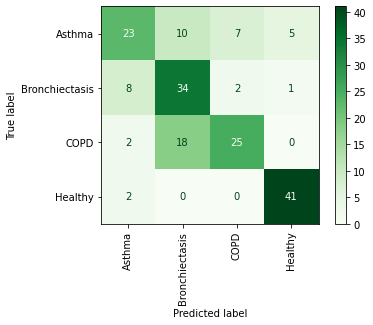

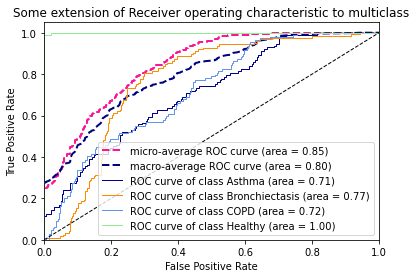

fit_time :  0.03320474624633789
score_time :  0.0025988101959228517
test_precision_macro :  0.5674686461470007
test_recall_macro :  0.5527899061392489
test_accuracy :  0.5502824858757063


In [187]:
m_logreg=LogisticRegression()

m_logreg.fit(X_train, y_train)

y_pred_logreg=m_logreg.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_logreg)))
print()
print(confusion_matrix(y_test, y_pred_logreg))

print(classification_report(y_test, y_pred_logreg))

print(plot_confusion_matrix(m_logreg, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, LogisticRegression())

model=LogisticRegression()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Stochaistic Gradient Classifier

Accuracy score: 0.4550561797752809

[[44  0  0  1]
 [44  0  0  1]
 [45  0  0  0]
 [ 6  0  0 37]]
                precision    recall  f1-score   support

        Asthma       0.32      0.98      0.48        45
Bronchiectasis       0.00      0.00      0.00        45
          COPD       0.00      0.00      0.00        45
       Healthy       0.95      0.86      0.90        43

      accuracy                           0.46       178
     macro avg       0.32      0.46      0.35       178
  weighted avg       0.31      0.46      0.34       178



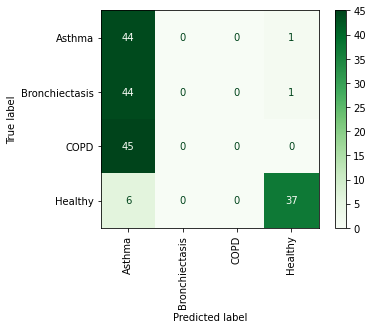

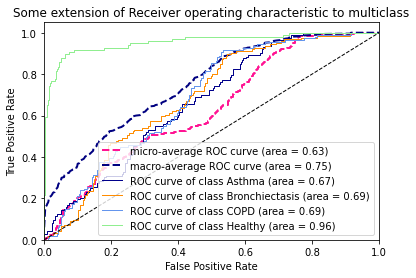

fit_time :  0.02827906608581543
score_time :  0.0013982772827148438
test_precision_macro :  0.3197060241856481
test_recall_macro :  0.4351516172850854
test_accuracy :  0.43172729003999233


In [192]:
m_sgd=SGDClassifier()

m_sgd.fit(X_train, y_train)

y_pred_sgd=m_sgd.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_sgd)))
print()
print(confusion_matrix(y_test, y_pred_sgd))

print(classification_report(y_test, y_pred_sgd))

print(plot_confusion_matrix(m_sgd, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, SGDClassifier())

model=SGDClassifier()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Perceptron

Accuracy score: 0.2640449438202247

[[ 1  0 44  0]
 [ 0  0 45  0]
 [ 5  0 40  0]
 [ 0  0 37  6]]
                precision    recall  f1-score   support

        Asthma       0.17      0.02      0.04        45
Bronchiectasis       0.00      0.00      0.00        45
          COPD       0.24      0.89      0.38        45
       Healthy       1.00      0.14      0.24        43

      accuracy                           0.26       178
     macro avg       0.35      0.26      0.17       178
  weighted avg       0.34      0.26      0.16       178



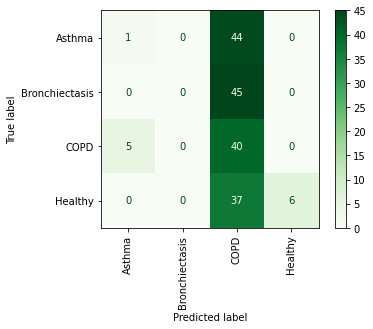

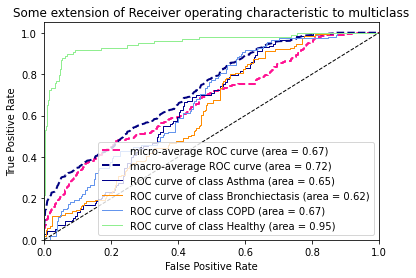

fit_time :  0.00927596092224121
score_time :  0.0023933887481689454
test_precision_macro :  0.304231907271816
test_recall_macro :  0.3900910265445149
test_accuracy :  0.38791341331809814


In [194]:
m_perc=Perceptron()

m_perc.fit(X_train, y_train)

y_pred_perc=m_perc.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_perc)))
print()
print(confusion_matrix(y_test, y_pred_perc))

print(classification_report(y_test, y_pred_perc))

print(plot_confusion_matrix(m_perc, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, Perceptron())

model=Perceptron()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Passive Aggressive Classifier

Accuracy score: 0.28651685393258425

[[ 8  0  0 37]
 [ 7  0  0 38]
 [13  0  0 32]
 [ 0  0  0 43]]
                precision    recall  f1-score   support

        Asthma       0.29      0.18      0.22        45
Bronchiectasis       0.00      0.00      0.00        45
          COPD       0.00      0.00      0.00        45
       Healthy       0.29      1.00      0.45        43

      accuracy                           0.29       178
     macro avg       0.14      0.29      0.17       178
  weighted avg       0.14      0.29      0.16       178



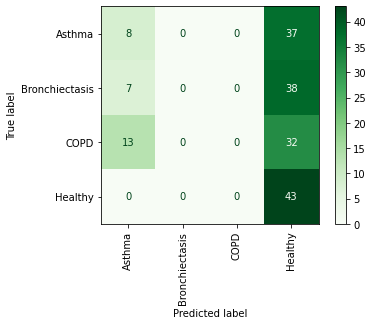

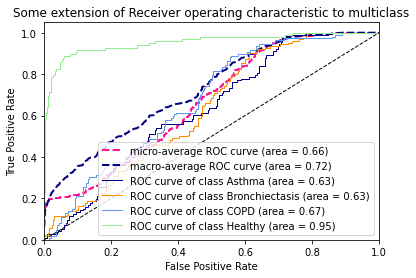

fit_time :  0.008949899673461914
score_time :  0.00378875732421875
test_precision_macro :  0.3992149351261163
test_recall_macro :  0.4520929466556362
test_accuracy :  0.446499079540405


In [196]:
m_pass=PassiveAggressiveClassifier()

m_pass.fit(X_train, y_train)

y_pred_pass=m_pass.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_pass)))
print()
print(confusion_matrix(y_test, y_pred_pass))

print(classification_report(y_test, y_pred_pass))

print(plot_confusion_matrix(m_pass, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, PassiveAggressiveClassifier())

model=PassiveAggressiveClassifier()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Linear Discriminant analysis

Accuracy score: 0.7584269662921348

[[20 11 14  0]
 [ 1 40  4  0]
 [ 7  6 32  0]
 [ 0  0  0 43]]
                precision    recall  f1-score   support

        Asthma       0.71      0.44      0.55        45
Bronchiectasis       0.70      0.89      0.78        45
          COPD       0.64      0.71      0.67        45
       Healthy       1.00      1.00      1.00        43

      accuracy                           0.76       178
     macro avg       0.76      0.76      0.75       178
  weighted avg       0.76      0.76      0.75       178

fit_time :  0.007653284072875977
score_time :  0.0033961772918701173
test_precision_macro :  0.75761194703808
test_recall_macro :  0.7479929732103645
test_accuracy :  0.7463149876214055


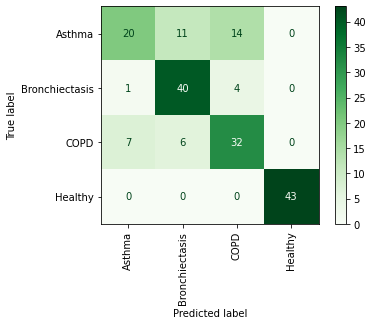

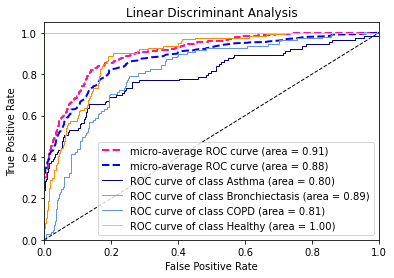

In [114]:
m_lda=LinearDiscriminantAnalysis()

m_lda.fit(X_train, y_train)

y_pred_lda=m_lda.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_lda)))
print()
print(confusion_matrix(y_test, y_pred_lda))

print(classification_report(y_test, y_pred_lda))

print(plot_confusion_matrix(m_lda, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, LinearDiscriminantAnalysis(), "Linear Discriminant Analysis")

model=LinearDiscriminantAnalysis()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Support Vector Machine (Linear)

Accuracy score: 0.7134831460674157

[[23 10 12  0]
 [ 5 34  6  0]
 [11  7 27  0]
 [ 0  0  0 43]]
                precision    recall  f1-score   support

        Asthma       0.59      0.51      0.55        45
Bronchiectasis       0.67      0.76      0.71        45
          COPD       0.60      0.60      0.60        45
       Healthy       1.00      1.00      1.00        43

      accuracy                           0.71       178
     macro avg       0.71      0.72      0.71       178
  weighted avg       0.71      0.71      0.71       178



TypeError: roc_curve_2() missing 1 required positional argument: 'm_name'

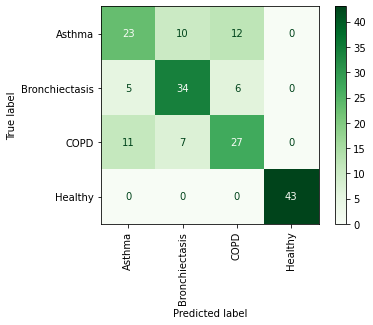

In [113]:
m_svml=SVC(kernel='linear')

m_svml.fit(X_train, y_train)

y_pred_svml=m_svml.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_svml)))
print()
print(confusion_matrix(y_test, y_pred_svml))

print(classification_report(y_test, y_pred_svml))

print(plot_confusion_matrix(m_svml, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, SVC(kernel='linear'))

model=SVC(kernel='linear')
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Support Vector Machine (RBF)

Accuracy score: 0.3595505617977528

[[ 0  0 31 14]
 [ 0  0 24 21]
 [ 0  0 29 16]
 [ 0  0  8 35]]
                precision    recall  f1-score   support

        Asthma       0.00      0.00      0.00        45
Bronchiectasis       0.00      0.00      0.00        45
          COPD       0.32      0.64      0.42        45
       Healthy       0.41      0.81      0.54        43

      accuracy                           0.36       178
     macro avg       0.18      0.36      0.24       178
  weighted avg       0.18      0.36      0.24       178



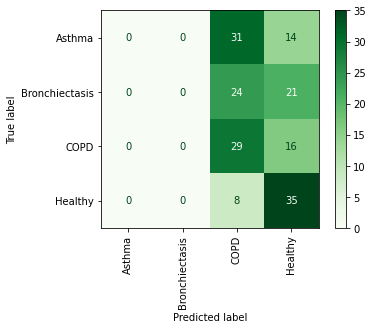

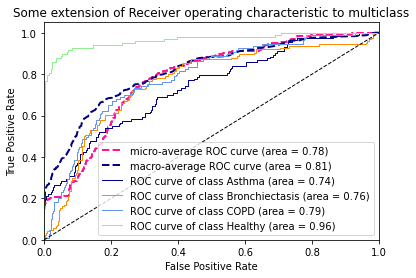

fit_time :  0.035701751708984375
score_time :  0.02144145965576172
test_precision_macro :  0.2453157021451231
test_recall_macro :  0.36991757820878146
test_accuracy :  0.366381006792357


In [212]:
m_svmr=SVC(kernel='rbf')

m_svmr.fit(X_train, y_train)

y_pred_svmr=m_svmr.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_svmr)))
print()
print(confusion_matrix(y_test, y_pred_svmr))

print(classification_report(y_test, y_pred_svmr))

print(plot_confusion_matrix(m_svmr, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, SVC(kernel='rbf'))

model=SVC(kernel='rbf')
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Support Vector Machine (Poly 3)

Accuracy score: 0.3707865168539326

[[ 0  3 30 12]
 [ 0  4 25 16]
 [ 1  5 29 10]
 [ 0  5  5 33]]
                precision    recall  f1-score   support

        Asthma       0.00      0.00      0.00        45
Bronchiectasis       0.24      0.09      0.13        45
          COPD       0.33      0.64      0.43        45
       Healthy       0.46      0.77      0.58        43

      accuracy                           0.37       178
     macro avg       0.26      0.38      0.29       178
  weighted avg       0.25      0.37      0.28       178



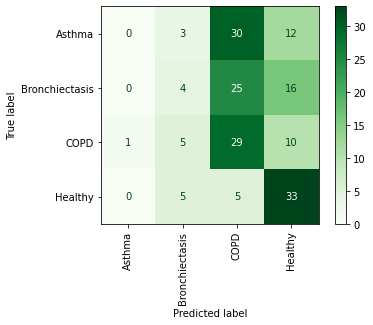

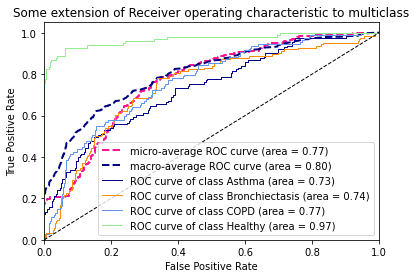

fit_time :  0.027893733978271485
score_time :  0.007313251495361328
test_precision_macro :  0.26461307539900203
test_recall_macro :  0.37577366179489535
test_accuracy :  0.37201168031486065


In [223]:
m_svmp3=SVC(kernel='poly', degree = 3)

m_svmp3.fit(X_train, y_train)

y_pred_svmp3=m_svmp3.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_svmp3)))
print()
print(confusion_matrix(y_test, y_pred_svmp3))

print(classification_report(y_test, y_pred_svmp3))

print(plot_confusion_matrix(m_svmp3, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_2(X_resampled, y_resampled, SVC(kernel='poly', degree = 3))

model=SVC(kernel='poly', degree = 3)
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Random Forest Classifier

Accuracy score: 0.9269662921348315

[[34  4  7  0]
 [ 0 43  2  0]
 [ 0  0 45  0]
 [ 0  0  0 43]]
                precision    recall  f1-score   support

        Asthma       1.00      0.76      0.86        45
Bronchiectasis       0.91      0.96      0.93        45
          COPD       0.83      1.00      0.91        45
       Healthy       1.00      1.00      1.00        43

      accuracy                           0.93       178
     macro avg       0.94      0.93      0.93       178
  weighted avg       0.94      0.93      0.93       178



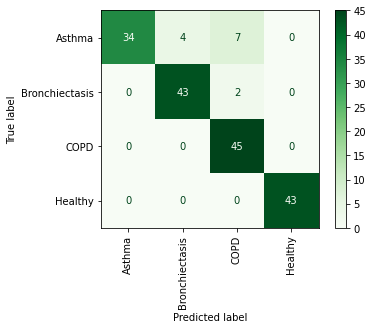

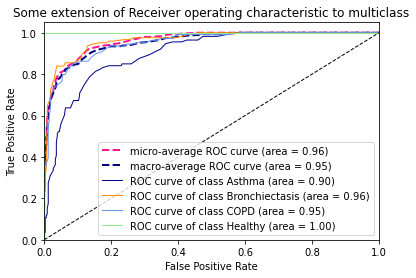

fit_time :  0.32434678077697754
score_time :  0.011957693099975585
test_precision_macro :  0.8719077083854959
test_recall_macro :  0.8583300395256916
test_accuracy :  0.8578937345267569


In [14]:
m_rand=RandomForestClassifier()

m_rand.fit(X_train, y_train)

y_pred_rand=m_rand.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_rand)))
print()
print(confusion_matrix(y_test, y_pred_rand))

print(classification_report(y_test, y_pred_rand))

print(plot_confusion_matrix(m_rand, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_1(X_resampled, y_resampled, RandomForestClassifier())

model=RandomForestClassifier()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

KNN

Accuracy score: 0.7584269662921348

[[14 14 11  6]
 [ 2 38  5  0]
 [ 0  2 43  0]
 [ 0  0  3 40]]
                precision    recall  f1-score   support

        Asthma       0.88      0.31      0.46        45
Bronchiectasis       0.70      0.84      0.77        45
          COPD       0.69      0.96      0.80        45
       Healthy       0.87      0.93      0.90        43

      accuracy                           0.76       178
     macro avg       0.79      0.76      0.73       178
  weighted avg       0.78      0.76      0.73       178

fit_time :  0.004003667831420898
score_time :  0.05265598297119141
test_precision_macro :  0.7130517722826688
test_recall_macro :  0.7141129699420903
test_accuracy :  0.7124547705199009


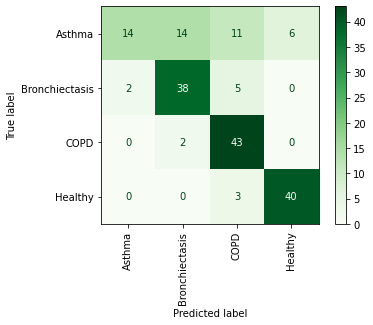

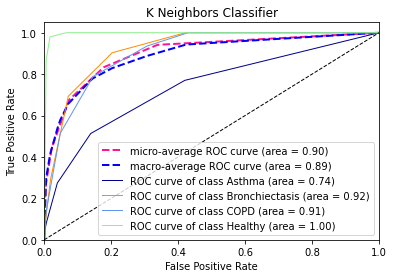

In [115]:
m_knn=KNeighborsClassifier()

m_knn.fit(X_train, y_train)

y_pred_knn=m_knn.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_knn)))
print()
print(confusion_matrix(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

print(plot_confusion_matrix(m_knn, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_1(X_resampled, y_resampled, KNeighborsClassifier(), "K Neighbors Classifier")

model=KNeighborsClassifier()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

Naives Bayes

Accuracy score: 0.5617977528089888

[[16 16 13  0]
 [ 2 34  9  0]
 [ 7 26 10  2]
 [ 2  0  1 40]]
                precision    recall  f1-score   support

        Asthma       0.59      0.36      0.44        45
Bronchiectasis       0.45      0.76      0.56        45
          COPD       0.30      0.22      0.26        45
       Healthy       0.95      0.93      0.94        43

      accuracy                           0.56       178
     macro avg       0.57      0.57      0.55       178
  weighted avg       0.57      0.56      0.55       178



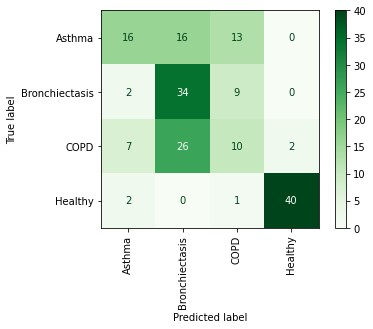

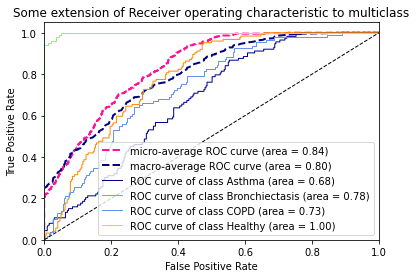

fit_time :  0.002000284194946289
score_time :  0.002986288070678711
test_precision_macro :  0.6487748241236938
test_recall_macro :  0.6120247724974721
test_accuracy :  0.6088491081063925


In [24]:
m_naives=GaussianNB()

m_naives.fit(X_train, y_train)

y_pred_naives=m_naives.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_naives)))
print()
print(confusion_matrix(y_test, y_pred_naives))

print(classification_report(y_test, y_pred_naives))

print(plot_confusion_matrix(m_naives, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_1(X_resampled, y_resampled, GaussianNB())

model=GaussianNB()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())

AdaBoost Classifier

Accuracy score: 0.5674157303370787

[[13 25  7  0]
 [ 1 41  3  0]
 [ 7 26 10  2]
 [ 2  0  4 37]]
                precision    recall  f1-score   support

        Asthma       0.57      0.29      0.38        45
Bronchiectasis       0.45      0.91      0.60        45
          COPD       0.42      0.22      0.29        45
       Healthy       0.95      0.86      0.90        43

      accuracy                           0.57       178
     macro avg       0.59      0.57      0.54       178
  weighted avg       0.59      0.57      0.54       178



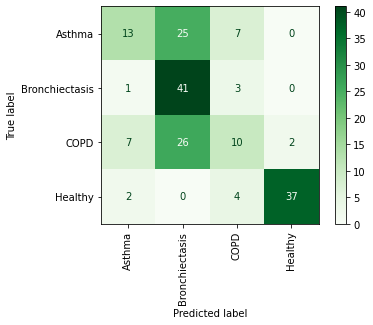

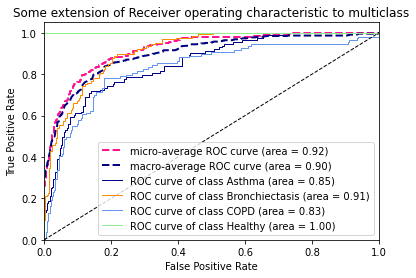

fit_time :  0.300985050201416
score_time :  0.010175228118896484
test_precision_macro :  0.5607196968166035
test_recall_macro :  0.5448096230249921
test_accuracy :  0.5411477178950042


In [26]:
m_ada=AdaBoostClassifier()

m_ada.fit(X_train, y_train)

y_pred_ada=m_ada.predict(X_test)

print("Accuracy score: "+str(accuracy_score(y_test, y_pred_ada)))
print()
print(confusion_matrix(y_test, y_pred_ada))

print(classification_report(y_test, y_pred_ada))

print(plot_confusion_matrix(m_ada, X_test, y_test, cmap='Greens', xticks_rotation='vertical'))

roc_curve_1(X_resampled, y_resampled, AdaBoostClassifier())

model=AdaBoostClassifier()
scoring = ['precision_macro', 'recall_macro', 'accuracy']
scores = cross_validate(model, X_resampled, y_resampled, scoring=scoring)
for key in scores.keys():
    print(key, ": ", scores[key].mean())